In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets 
from IPython.display import display 
import pylab
from sklearn.compose import ColumnTransformer
import sklearn
import keras.layers as kl
from sklearn.utils import shuffle
import keras
import tensorflow.keras.layers as layers
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [1]:
import pandas as pd
import os

import stellargraph as sg
from stellargraph.mapper import FullBatchNodeGenerator
from stellargraph.layer import GCN

from tensorflow.keras import layers, optimizers, losses, metrics, Model
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets 
from IPython.display import display 
import pylab
import sklearn
import keras.layers as kl
from numpy import genfromtxt
from numpy import asarray
from numpy import savetxt
import networkx as nx

In [116]:
dataset = sg.datasets.Cora()
display(HTML(dataset.description))
G, node_subjects = dataset.load()

In [42]:
model = keras.models.load_model(r'C:\Users\Ryan\Desktop\Research\Sanity_model1')

In [86]:
df_arsenic_prelim = pd.read_csv (r'C:\Users\Ryan\Desktop\Research\Data\Prelim-data\as.csv')

In [173]:
df_arsenic_prelim

,SiteID,As,X_Albers,Y_Albers,WellDepth,AvgAnnualN_CAFO_1992_97,AvgAnnualN_Fert_1992_2001,AWC,AWS25,BFI,...,Transmiss,TWI,VRT,VWC,YngWtrMeanAge,YngWtrMeanAge_VertMean,DTW,Data,as10,Pred
0,1,6.0,924000.0,2006000.0,105.912831,16.678065,48.483771,0.141277,5.384314,21.0,...,143.362904,9.902970,5.956547,0.304000,23.158235,17.689265,3.082386,train,0.0,0.00
1,2,1.0,892000.0,2080000.0,54.861323,7.688502,50.638261,0.217775,7.311919,37.0,...,137.152244,9.067347,4.196766,0.343552,22.015855,17.739371,3.076582,train,0.0,0.06
2,3,13.0,886000.0,2066000.0,34.745504,6.245885,43.503552,0.140200,5.400000,33.0,...,121.646066,11.470297,17.558480,0.270166,17.762669,15.950136,5.645093,train,1.0,0.83
3,4,1.0,898000.0,2076000.0,59.737885,4.900404,34.132068,0.154753,5.318469,37.0,...,298.232568,9.815662,1.231952,0.328985,27.709500,17.589893,1.044807,train,0.0,0.03
4,5,2.0,896000.0,2062000.0,45.717769,6.511748,45.355325,0.140200,5.400000,28.0,...,97.123320,9.435353,21.539828,0.268193,19.238581,14.557619,8.535328,train,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9997,0.0,536000.0,2390000.0,35.964645,3.949343,11.546021,0.082813,2.720000,74.0,...,54.346575,8.505940,6.354813,0.160139,14.421028,10.310266,11.500084,test,0.0,0.00
9997,9998,1.0,610000.0,2484000.0,19.506248,8.030330,10.843744,0.159466,4.090000,59.0,...,115.224598,13.790910,0.416030,0.344196,8.765928,16.686542,0.188501,test,0.0,0.11
9998,9999,6.0,616000.0,2526000.0,24.992380,0.158934,0.199489,0.126106,4.030000,63.0,...,40.882361,11.154347,1.048951,0.253424,15.627269,11.281490,1.518130,test,0.0,0.01
9999,10000,0.0,602000.0,2586000.0,26.211521,0.004975,0.015434,0.126106,4.030000,66.0,...,59.112810,13.113131,0.520421,0.280687,21.815356,15.832110,0.643534,test,0.0,0.05


In [174]:
df_arsenic_prelim.isnull().values.any()
df_arsenic_prelim.isnull().sum()
df_arsenic_prelim = df_arsenic_prelim.dropna()

In [94]:
X = df_arsenic_prelim.iloc[:,4:-3]
Y_TRUE = df_arsenic_prelim.iloc[:,1]
Y_PRED_BIN = df_arsenic_prelim.iloc[:,-2]
Y_PRED_CONTINUOUS = df_arsenic_prelim.iloc[:,-1]

In [95]:
Y_TRUE
r = np.ptp(Y_TRUE)
print("Range:", r)
print("Max:",max(Y_TRUE))
print("Max:",min(Y_TRUE))

Range: 280.0
Max: 280.0
Max: 0.0


In [96]:
print('Shape of X: ', X.shape)
print('Shape of Y_TRUE: ', Y_TRUE.shape)
print('Shape of Y_PRED_BIN: ', Y_PRED_BIN.shape)
print('Shape of Y_PRED_CONFIDENCE: ', Y_PRED_CONTINUOUS.shape)

Shape of X:  (7616, 80)
Shape of Y_TRUE:  (7616,)
Shape of Y_PRED_BIN:  (7616,)
Shape of Y_PRED_CONFIDENCE:  (7616,)


In [97]:
No_of_train_samples = int((X.shape[0] * 3) / 4)
remaining_samples = X.shape[0] - No_of_train_samples
TrainX = np.array(X.iloc[:No_of_train_samples,:])
TrainY = np.array(Y_TRUE)[:No_of_train_samples]

TestX = np.array(X.iloc[No_of_train_samples:,:])
TestY = np.array(Y_TRUE)[No_of_train_samples:]
Test_old_pred = np.array(Y_PRED_CONTINUOUS)[No_of_train_samples:]

scaler_1 = sklearn.preprocessing.StandardScaler()
#scaler_1 = sklearn.preprocessing.MinMaxScaler()
scaler_1 = scaler_1.fit(TrainX)
TrainX = scaler_1.transform(TrainX)
TestX = scaler_1.transform(TestX)
scaler_2 = sklearn.preprocessing.StandardScaler()
#scaler_2 = sklearn.preprocessing.MinMaxScaler()
scaler_2 = scaler_2.fit(TrainY.reshape(-1,1))
TrainY = scaler_2.transform(TrainY.reshape(-1,1))
TestY = scaler_2.transform(TestY.reshape(-1,1))
TrainY = TrainY.reshape(-1)
TestY = TestY.reshape(-1)

In [98]:
print('Shape of TrainX: ', TrainX.shape)
print('Shape of TestX: ', TestX.shape)
print('Shape of TrainY: ', TrainY.shape)
print('Shape of TestY: ', TestY.shape) 

Shape of TrainX:  (5712, 80)
Shape of TestX:  (1904, 80)
Shape of TrainY:  (5712,)
Shape of TestY:  (1904,)


In [210]:
TrainY.shape

(5712,)

In [99]:
model = keras.models.load_model(r'C:\Users\Ryan\Desktop\Research\Sanity_model1')

In [101]:
initial_model =  keras.models.load_model(r'C:\Users\Ryan\Desktop\Research\Sanity_model1')

feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)

# Call feature extractor on test input.
x = TrainX
features = feature_extractor(x)

In [102]:
features[4].shape

TensorShape([5712, 32])

In [129]:
train_features = features[4]

In [106]:
euclidean_matrix_recovered = genfromtxt(r'C:\Users\Ryan\Desktop\Research\Data\Prelim-data\euclidean_dist_matrix.csv', delimiter=',')

In [107]:
euclidean_matrix_recovered.shape

(7616, 7616)

In [110]:
euclidean_matrix_train = euclidean_matrix_recovered[:TrainX.shape[0],:TrainX.shape[0]]
euclidean_matrix_train.shape

(5712, 5712)

In [111]:
print("the Minimum Euclidean distance obtained is: ",np.min(euclidean_matrix_recovered))
print("the Maximum Euclidean distance obtained is: ",np.max(euclidean_matrix_recovered))
euclidean_matrix_recovered.shape

the Minimum Euclidean distance obtained is:  0.0
the Maximum Euclidean distance obtained is:  4159862.016942389


(7616, 7616)

In [112]:
cutoff_euclidean = 25000

In [128]:
num=0
Edge_matrix = np.zeros((euclidean_matrix_train.shape[0],euclidean_matrix_train.shape[0]))
for i in range(euclidean_matrix_train.shape[0]):
    for j in range(euclidean_matrix_train.shape[0]):
        if (i!=j) and  (euclidean_matrix_train[i,j] > 0) and (euclidean_matrix_train[i,j] < cutoff_euclidean):
            Edge_matrix[i,j]=1
            num+=1
print(num)

283054


In [130]:
G = nx.from_numpy_matrix(Edge_matrix)
n = G.number_of_nodes()
m = G.number_of_edges()
print(n,m)
G

5712 141527


In [204]:
a = {i:train_features[i,:] for i in range(train_features.shape[0])}
a = pd.DataFrame(a)
a = a.T
a

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,64292.218750,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,...,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,9907.250977,-1.758099,-1.758099,14245.604492
1,44890.125000,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,...,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,457.911560,3574.326172,-1.758099,19559.091797
2,41795.003906,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,...,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,3258.218018,1887.578247,-1.758099,19813.582031
3,51790.968750,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,...,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,3157.789307,-1.758099,18602.615234
4,38781.535156,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,...,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,3703.148193,7064.402832,-1.758099,23982.119141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,29867.605469,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,...,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,3646.343750,-1.758099,-1.758099,10400.943359
5708,25816.505859,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,...,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,5717.809082,1030.184448,-1.758099,11923.977539
5709,37329.960938,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,...,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,26222.773438,-1.758099,-1.758099,-1.758099
5710,23489.126953,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,...,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,-1.758099,5758.287598,-1.758099,-1.758099,4357.939453


In [205]:
from stellargraph import StellarGraph
Stel_train = StellarGraph.from_networkx(G,node_features=a)

In [206]:
Stel_train

In [207]:
print(Stel_train.info())

StellarGraph: Undirected multigraph
 Nodes: 5712, Edges: 141527

 Node types:
  default: [5712]
    Features: float32 vector, length 32
    Edge types: default-default->default

 Edge types:
    default-default->default: [141527]
        Weights: all 1 (default)
        Features: none


In [208]:
generator = FullBatchNodeGenerator(Stel_train, method="gcn")

Using GCN (local pooling) filters...


In [213]:
train_gen = generator.flow(np.arange(0,train_features.shape[0]),TrainY)

In [228]:
TrainY

array([ 6.,  1., 13., ...,  3., 11.,  0.])

In [214]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=generator, dropout=0.5
)

In [ ]:
x_inp, x_out = gcn.in_out_tensors()
x_out

In [221]:
predictions = layers.Dense(1, activation="selu")(x_out)

In [233]:
optimizer1 = tf.keras.optimizers.SGD(learning_rate=1e-6,momentum=0.56,nesterov=True,name='SGD')

model = Model(inputs=x_inp, outputs=predictions)
model.compile(
    optimizer=optimizer1,
    loss='mse',
    metrics=["mse"],
)

In [234]:
history = model.fit(
    train_gen,
    epochs=100000,
    verbose=2,
)

Epoch 1/100000
1/1 - 0s - loss: 185.0770 - mse: 185.0770
Epoch 2/100000
1/1 - 0s - loss: 185.1023 - mse: 185.1023
Epoch 3/100000
1/1 - 0s - loss: 185.0959 - mse: 185.0959
Epoch 4/100000
1/1 - 0s - loss: 185.1292 - mse: 185.1292
Epoch 5/100000
1/1 - 0s - loss: 185.1292 - mse: 185.1292
Epoch 6/100000
1/1 - 0s - loss: 185.1268 - mse: 185.1268
Epoch 7/100000
1/1 - 0s - loss: 185.1252 - mse: 185.1252
Epoch 8/100000
1/1 - 0s - loss: 185.0896 - mse: 185.0896
Epoch 9/100000
1/1 - 0s - loss: 185.1339 - mse: 185.1339
Epoch 10/100000
1/1 - 0s - loss: 185.0738 - mse: 185.0738
Epoch 11/100000
1/1 - 0s - loss: 185.1142 - mse: 185.1142
Epoch 12/100000
1/1 - 0s - loss: 185.1118 - mse: 185.1118
Epoch 13/100000
1/1 - 0s - loss: 185.0991 - mse: 185.0991
Epoch 14/100000
1/1 - 0s - loss: 185.0983 - mse: 185.0983
Epoch 15/100000
1/1 - 0s - loss: 185.1078 - mse: 185.1078
Epoch 16/100000
1/1 - 0s - loss: 185.1094 - mse: 185.1094
Epoch 17/100000
1/1 - 0s - loss: 185.0833 - mse: 185.0833
Epoch 18/100000
1/1 - 0

KeyboardInterrupt: 

In [238]:
a = model.predict(train_gen)

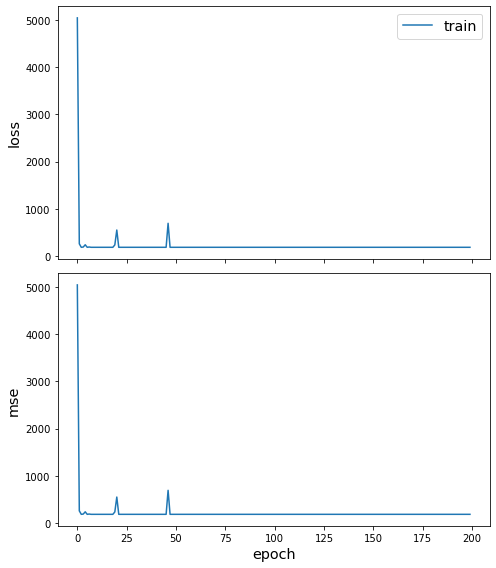

In [225]:
sg.utils.plot_history(history)

In [26]:
test_gen = generator.flow(test_subjects.index, test_targets)